In [ ]:
!mkdir dataset
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/CleanThoracicSurgery.csv -P dataset -nc

mkdir: cannot create directory ‘dataset’: File exists
--2021-11-07 21:46:36--  https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/CleanThoracicSurgery.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22704 (22K) [text/plain]
Saving to: ‘dataset/CleanThoracicSurgery.csv’

CleanThoracicSurger 100%[===================>]  22.17K  --.-KB/s    in 0.001s  

2021-11-07 21:46:36 (16.0 MB/s) - ‘dataset/CleanThoracicSurgery.csv’ saved [22704/22704]



In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
DATASET_PATH = Path('.') / 'dataset' / 'CleanThoracicSurgery.csv'


def load_dataset():
    df = pd.read_csv(DATASET_PATH)
    return df

In [ ]:
binary_categories = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough',
'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD',
'Smoking', 'Asthma', 'Death_1yr']

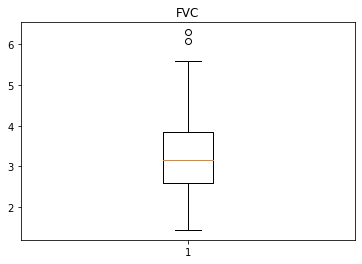

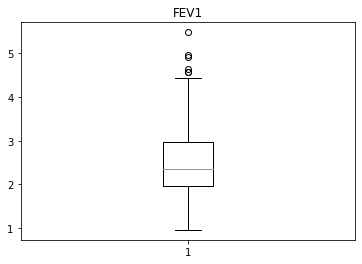

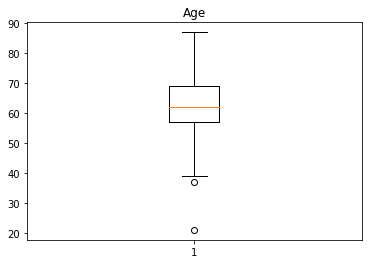

In [ ]:
%matplotlib inline


df = load_dataset()

for col in df:
  if df[col].dtype == 'object' or col in binary_categories:
    continue
  fig, axs = plt.subplots()
  axs.boxplot(df[col])
  axs.set_title(col)
  


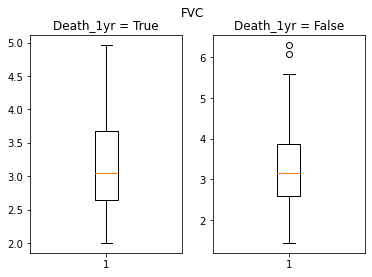

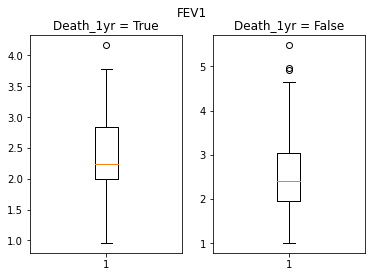

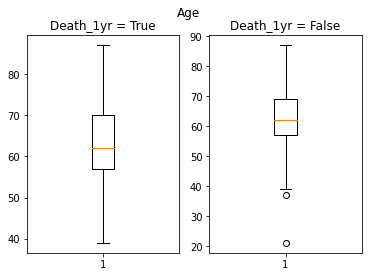

In [ ]:
%matplotlib inline


df = load_dataset()

df_positive = df[df["Death_1yr"] == True]
df_negative = df[df["Death_1yr"] == False]

for col in df:
  if df[col].dtype == 'object' or col in binary_categories:
    continue
  fig, axs = plt.subplots(1, 2)
  fig.suptitle(col)
  axs[0].boxplot(df_positive[col])
  axs[0].set_title('Death_1yr = True')
  axs[1].boxplot(df_negative[col])
  axs[1].set_title('Death_1yr = False')

# TODO: fare la stessa cosa anche per le variabili binarie, utilizzando dei plot con media e deviazione standard 


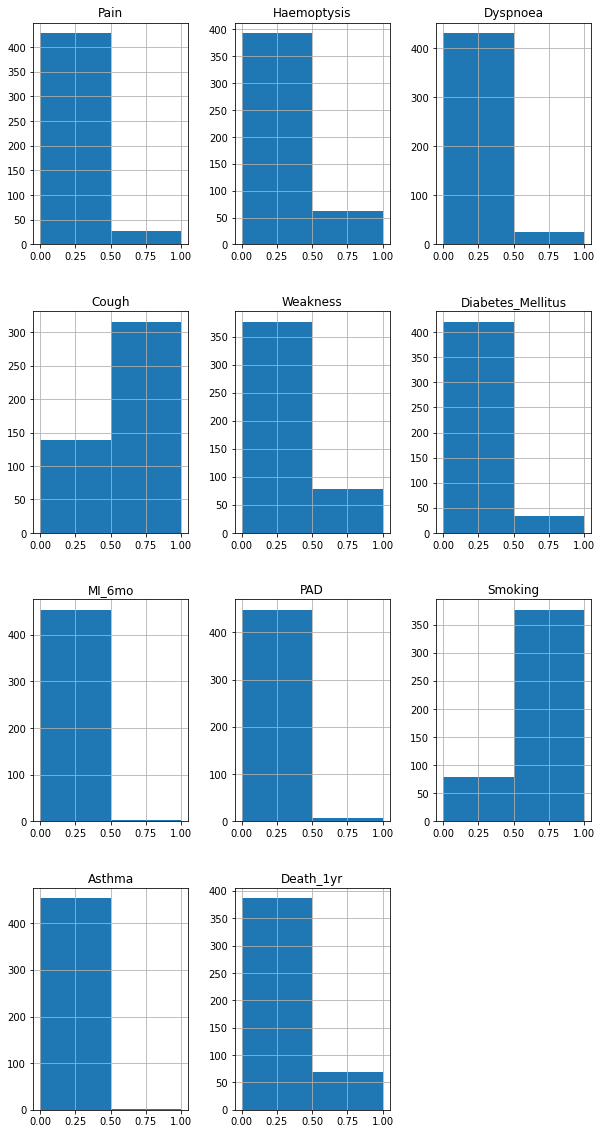

In [ ]:
df[binary_categories].hist(figsize=(10,20), bins=2)
print()

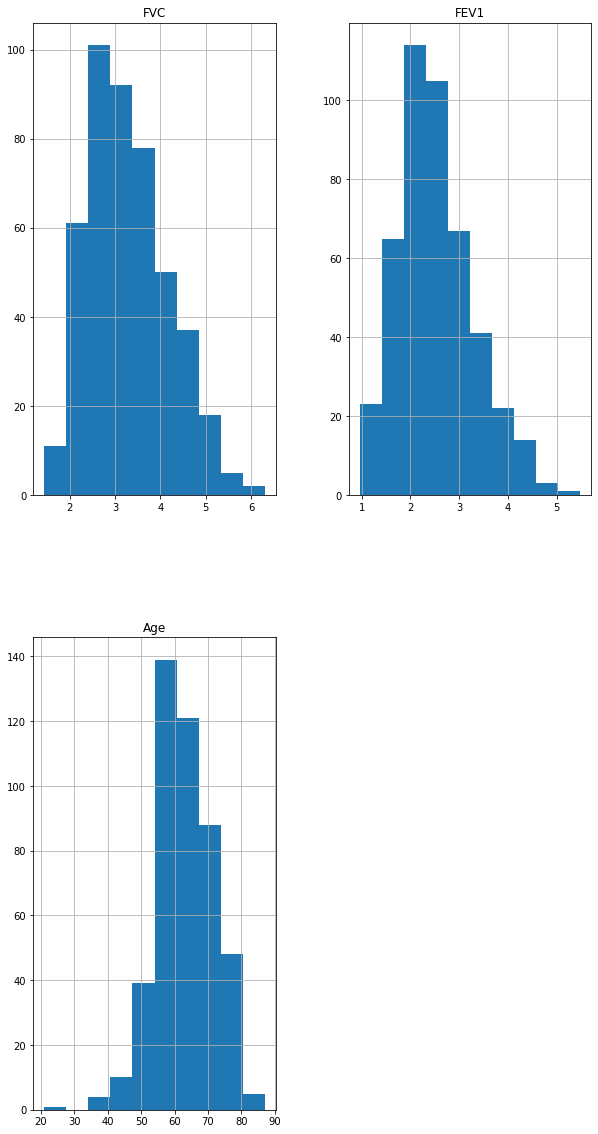

In [ ]:
df.drop(binary_categories, inplace=False, axis=1).hist(figsize=(10,20))
print()

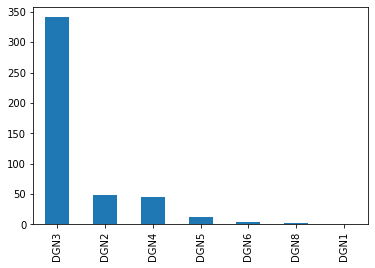

In [ ]:
df['Diagnosis'].value_counts().plot(kind='bar')
print()

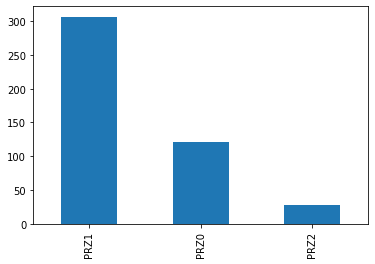

In [ ]:
df['Performance'].value_counts().plot(kind='bar')
print()

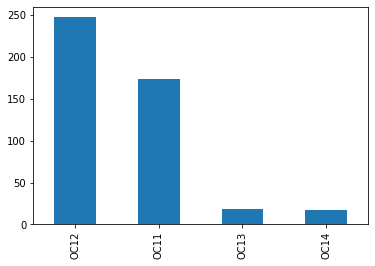

In [ ]:
df['Tumor_Size'].value_counts().plot(kind='bar')
print()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='copper_r')

,FVC,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
FVC,1.000000,0.887629,0.002314,-0.103153,0.070447,-0.063979,-0.104872,-0.119992,-0.009675,-0.036955,-0.009885,-0.061944,-0.285144,-0.044533
FEV1,0.887629,1.000000,0.012448,-0.158192,0.024821,-0.132661,-0.127682,-0.110765,-0.034142,-0.032711,-0.051169,-0.078987,-0.295495,-0.072821
Pain,0.002314,0.012448,1.000000,0.225624,0.061907,-0.055571,-0.064880,0.034755,-0.016689,-0.033601,-0.081340,-0.016689,0.058561,0.075355
Haemoptysis,-0.103153,-0.158192,0.225624,1.000000,0.101023,0.068715,0.074306,0.008942,-0.026392,0.093096,-0.020890,-0.026392,0.085480,0.082120
Dyspnoea,0.070447,0.024821,0.061907,0.101023,1.000000,0.076163,-0.058494,-0.031843,-0.016021,0.114513,-0.042251,-0.016021,0.004298,0.113174
Cough,-0.063979,-0.132661,-0.055571,0.068715,0.076163,1.000000,0.200394,0.025165,0.044069,0.016118,0.199857,-0.028058,0.143508,0.094172
Weakness,-0.104872,-0.127682,-0.064880,0.074306,-0.058494,0.200394,1.000000,0.070334,0.057928,0.027890,0.116124,-0.030223,0.205173,0.084079
Diabetes_Mellitus,-0.119992,-0.110765,0.034755,0.008942,-0.031843,0.025165,0.070334,1.000000,-0.018883,0.025578,-0.046266,-0.018883,0.090474,0.112879
MI_6mo,-0.009675,-0.034142,-0.016689,-0.026392,-0.016021,0.044069,0.057928,-0.018883,1.000000,-0.008889,0.030457,-0.004415,-0.032134,-0.028093
PAD,-0.036955,-0.032711,-0.033601,0.093096,0.114513,0.016118,0.027890,0.025578,-0.008889,1.000000,0.061321,-0.008889,0.057025,0.036683
